# Homework Assignment - Lesson 2: Data Cleaning - Handling Missing Values and Outliers

**Student Name:** Alejandro Valencia  
**Date:** 9/14/2025  
**Course:** Data Management  

---

## Instructions

Complete all the tasks below by adding your R code in the code cells and your written responses in markdown cells. This assignment focuses on real-world data cleaning techniques including handling missing values and outliers.

**💡 Key Learning Goals:**
- Identify and handle missing values using multiple strategies
- Detect and treat outliers using statistical methods
- Make informed decisions about data quality trade-offs
- Document your data cleaning process and reasoning

**📋 SUBMISSION**: When you're done, see [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for complete submission instructions.

---

### Part 1: Data Import and Initial Assessment

In this section, you'll import a "messy" dataset that contains missing values and outliers, simulating real-world data quality challenges.

#### 1.1 Environment Setup

Load the required packages for data cleaning and analysis.

In [2]:
# Load required packages for data cleaning
library(tidyverse) # For data manipulation and visualization

# Check current working directory
setwd('/workspaces/assignment-2-version3-Alejandro-V45/data')
getwd()

[1] "/workspaces/assignment-2-version3-Alejandro-V45/data"

#### 1.2 Import Messy Dataset

Import the provided messy sales dataset that contains real-world data quality issues including missing values, outliers, and inconsistencies.

In [4]:
# Import the messy sales dataset
messy_sales <- read_csv("messy_sales_data.csv")

print("Messy sales dataset imported successfully!")
print(paste("Dataset contains", nrow(messy_sales), "rows and", ncol(messy_sales), "columns"))
cat("Column names:", paste(names(messy_sales), collapse = ", "))

Rows: 200 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Customer_Name, Product_Category
dbl  (3): TransactionID, Sales_Amount, Quantity
date (1): Purchase_Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Messy sales dataset imported successfully!"
[1] "Dataset contains 200 rows and 6 columns"
Column names: TransactionID, Customer_Name, Product_Category, Sales_Amount, Purchase_Date, Quantity

#### 1.3 Initial Data Assessment

Perform a comprehensive inspection of the messy dataset to understand its structure and identify data quality issues.

In [7]:
# Inspect the messy dataset
print("=== DATASET OVERVIEW ===")
head(messy_sales, 10) # First 10 rows
str(messy_sales)
print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

[1] "=== DATASET OVERVIEW ==="


TransactionID,Customer_Name,Product_Category,Sales_Amount,Purchase_Date,Quantity
<dbl>,<chr>,<chr>,<dbl>,<date>,<dbl>
1,NA,Home,362.3175,NA,2
2,Alice Brown,Clothing,573.0791,2023-10-21,3
3,Jane Doe,Electronics,487.6874,2023-12-28,-1
4,Jane Doe,Electronics,5000.0000,2023-06-16,7
5,John Smith,Books,344.1746,2023-05-05,100
6,John Smith,Books,434.9527,2023-11-28,4
7,Jane Doe,Home,489.0863,2023-08-17,0
8,Jane Doe,Electronics,536.9202,2023-05-17,7
9,Jane Doe,Clothing,793.3933,2023-08-13,3


spc_tbl_ [200 × 6] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ TransactionID   : num [1:200] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_Name   : chr [1:200] NA "Alice Brown" "Jane Doe" "Jane Doe" ...
 $ Product_Category: chr [1:200] "Home" "Clothing" "Electronics" "Electronics" ...
 $ Sales_Amount    : num [1:200] 362 573 488 5000 344 ...
 $ Purchase_Date   : Date[1:200], format: NA "2023-10-21" ...
 $ Quantity        : num [1:200] 2 3 -1 7 100 4 0 7 3 2 ...
 - attr(*, "spec")=
  .. cols(
  ..   TransactionID = col_double(),
  ..   Customer_Name = col_character(),
  ..   Product_Category = col_character(),
  ..   Sales_Amount = col_double(),
  ..   Purchase_Date = col_date(format = ""),
  ..   Quantity = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 
[1] "=== SUMMARY STATISTICS ==="


 TransactionID    Customer_Name      Product_Category    Sales_Amount     
 Min.   :  1.00   Length:200         Length:200         Min.   :  -100.0  
 1st Qu.: 50.75   Class :character   Class :character   1st Qu.:   362.6  
 Median :100.50   Mode  :character   Mode  :character   Median :   531.3  
 Mean   :100.50                                         Mean   :  1614.9  
 3rd Qu.:150.25                                         3rd Qu.:   694.5  
 Max.   :200.00                                         Max.   :100000.0  
                                                        NA's   :22        
 Purchase_Date           Quantity     
 Min.   :2023-01-06   Min.   : -1.00  
 1st Qu.:2023-03-26   1st Qu.:  2.00  
 Median :2023-06-28   Median :  5.00  
 Mean   :2023-06-23   Mean   : 12.52  
 3rd Qu.:2023-09-12   3rd Qu.:  8.00  
 Max.   :2023-12-28   Max.   :100.00  
 NA's   :14                           

# Structure and summary of the data
print("=== DATA STRUCTURE ===")
str(messy_sales)

print("=== SUMMARY STATISTICS ===")
summary(messy_sales)

In [ ]:
**Data Quality Assessment:**

Based on the imported messy_sales dataset, document all the data quality issues you observe:

1. **Missing Values:** [Look for NA values - which columns have missing data?]

2. **Potential Outliers:** [Check Sales_Amount and Quantity - do any values seem extreme?]

3. **Data Inconsistencies:** [Look at Product_Category - are there inconsistent naming conventions?]

4. **Data Types:** [Are Purchase_Date and Sales_Amount using appropriate data types?]

5. **Invalid Values:** [Are there any logically impossible values like negative quantities?]

**YOUR OBSERVATIONS:**

1. Already within the head() output, we can see that there are missing values in the Sales_Amount and Quantity columns.
2. The Quantity column has a negative value (-1), which is not logical for a sales quantity. The sales amount also contains
    a negative value (-50.00), which is not valid. The table also shows an amount of 5000.00, which seems unusually high and could be an outlier.
3. In the Product_Category column, there are inconsistent naming conventions such as "Electronics" and "electronics".
4. The data types for the Purchase_Date and Sales_Amount appear appropriate.
5. There are negative values in the Quantity and Sales_Amount columns, which are invalid for sales data.

---

### Part 2: Missing Value Analysis and Treatment

In this section, you'll identify missing values and apply different strategies to handle them.



Complete the following tasks to thoroughly understand the missing value patterns in your dataset.

In [8]:
# TODO: Calculate total missing values in the entire dataset
total_missing <- sum(is.na(messy_sales))

# TODO: Calculate missing values per column
missing_per_column <- colSums(is.na(messy_sales))

# TODO: Identify rows with missing values
incomplete_rows <- messy_sales[!complete.cases(messy_sales), ]

print(paste("Total missing values:", total_missing))
print("Missing values per column:")
print(missing_per_column)
print("Rows with missing values:")
print(incomplete_rows)

[1] "Total missing values: 52"
[1] "Missing values per column:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0               16                0               22 
   Purchase_Date         Quantity 
              14                0 
[1] "Rows with missing values:"
# A tibble: 44 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             1 NA            Home                     362. NA           
 2            16 Bob Johnson   Books                    246. NA           
 3            18 John Smith    electronics               NA  2023-05-21   
 4            21 NA            Books                    483. 2023-04-04   
 5            23 Jane Doe      Home                      NA  2023-01-11   
 6            26 NA            Clothing                 531. 2023-09-12   
 7            31 Jane Doe      Books                    715. NA           
 8

In [ ]:
"#### 2.2 Missing Value Treatment - Option A (Removal)
",

Create a dataset with all missing value rows removed and compare the results.

[1] "#### 2.2 Missing Value Treatment - Option A (Removal)\n"

[1] "Data after removing NA rows:"
# A tibble: 156 × 6
   TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
           <dbl> <chr>         <chr>                   <dbl> <date>       
 1             2 Alice Brown   Clothing                 573. 2023-10-21   
 2             3 Jane Doe      Electronics              488. 2023-12-28   
 3             4 Jane Doe      Electronics             5000  2023-06-16   
 4             5 John Smith    Books                    344. 2023-05-05   
 5             6 John Smith    Books                    435. 2023-11-28   
 6             7 Jane Doe      Home                     489. 2023-08-17   
 7             8 Jane Doe      Electronics              537. 2023-05-17   
 8             9 Jane Doe      Clothing                 793. 2023-08-13   
 9            10 Jane Doe      electronics              649. 2023-10-16   
10            11 Bob Johnson   ELECTRONICS              596. 2023-10-20   
# ℹ 146 more rows
# ℹ 1 more variable: Quanti

In [12]:
# TODO: Remove all rows with missing values
sales_removed_na <- na.omit(messy_sales)

# Compare dimensions
print("Original dataset dimensions:")
print(dim(messy_sales))
print("After removing NA rows:")
print(dim(sales_removed_na))
print(paste("Rows lost:", nrow(messy_sales) - nrow(sales_removed_na)))

[1] "Original dataset dimensions:"
[1] 200   6
[1] "After removing NA rows:"
[1] 156   6
[1] "Rows lost: 44"


#### 2.3 Missing Value Treatment - Option B (Imputation)


Apply appropriate imputation strategies for different types of variables.

In [13]:
## Create a copy for imputation
sales_imputed <- messy_sales


In [14]:
### TODO: Create a mode function for categorical variables
get_mode <- function(v) {
  uniqv <- unique(v[!is.na(v)]) # Unique values excluding NAs
  uniqv[which.max(tabulate(match(v, uniqv)))] # Return the most frequent value
  ### Hint: Use unique(), tabulate(), match(), and which.max()
}

In [15]:
### TODO: Impute Customer_Name with mode (for categorical missing values)
sales_imputed$Customer_Name <- ifelse(is.na(sales_imputed$Customer_Name),
                                     get_mode(sales_imputed$Customer_Name),
                                     sales_imputed$Customer_Name)

In [16]:
### To practice median imputation, try it on Quantity column
### TODO: Impute Quantity with median (alternative approach for numeric data)
sales_imputed$Quantity <- ifelse(is.na(sales_imputed$Quantity),
                                 median(sales_imputed$Quantity, na.rm = TRUE),
                                 sales_imputed$Quantity)

In [17]:
### Verify imputation success
print("Missing values after imputation:")
print(colSums(is.na(sales_imputed)))

[1] "Missing values after imputation:"
   TransactionID    Customer_Name Product_Category     Sales_Amount 
               0                0                0               22 
   Purchase_Date         Quantity 
              14                0 


In [ ]:
#### 2.4 Compare Missing Value Strategies Analyze the impact of different missing value treatment approaches.

In [18]:
# Compare summary statistics
print("=== ORIGINAL DATA ===")
summary(messy_sales$Sales_Amount)

[1] "=== ORIGINAL DATA ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 

In [19]:
print("=== AFTER REMOVING NAs ===")
summary(sales_removed_na$Sales_Amount)

[1] "=== AFTER REMOVING NAs ==="


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
   -56.72    361.79    537.48   1729.00    715.74 100000.00 

In [20]:
print("=== AFTER IMPUTATION ===")
summary(sales_imputed$Sales_Amount)

[1] "=== AFTER IMPUTATION ==="


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
  -100.0    362.6    531.3   1614.9    694.5 100000.0       22 


**Analysis Questions:**

1. **Which approach would you recommend for this dataset and why?**
   
   I would use the median imputation for the Quantity column because it is a numeric variable and the median is less affected by outliers compared to the mean. For the Customer_Name column, I would use mode imputation because it is a categorical variable, and replacing missing values with the most frequent category helps maintain the distribution of the data.

2. **What are the trade-offs between removal and imputation?**
   
    Removal of rows with missing values can lead to a loss of valuable data, especially if the rest of the data within those rows are nor random. This can reduce the statistical power of analyses and potentially bias results. Imputation allows for the retention of all data points but introduces assumptions about the missing values that may not hold true. Imputed values may not accurately reflect the true values, leading to potential inaccuracies in analyses.



---

"### Part 3: Outlier Detection and Treatment
",

Using your imputed dataset, identify and handle outliers in the Sales_Amount variable.

In [ ]:
"#### 3.1 Outlier Detection Using IQR Method
",

Apply the interquartile range method to identify outliers in Sales_Amount.

In [21]:
### TODO: Calculate quartiles and IQR for Sales_Amount
Q1_sales <- quantile(messy_sales$Sales_Amount, 0.25, na.rm = TRUE)
Q3_sales <- quantile(messy_sales$Sales_Amount, 0.75, na.rm = TRUE)
IQR_sales <- Q3_sales - Q1_sales

In [23]:
### TODO: Calculate outlier thresholds
upper_threshold <- Q3_sales + 1.5 * IQR_sales
lower_threshold <- Q1_sales - 1.5 * IQR_sales

In [24]:
### TODO: Identify outliers
outliers <- messy_sales %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)

print(paste("Q1:", Q1_sales))
print(paste("Q3:", Q3_sales))
print(paste("IQR:", IQR_sales))
print(paste("Lower threshold:", lower_threshold))
print(paste("Upper threshold:", upper_threshold))
print(paste("Number of outliers found:", nrow(outliers)))
print("Outlier rows:")
print(outliers)

[1] "Q1: 362.578164415014"
[1] "Q3: 694.479236061358"
[1] "IQR: 331.901071646344"
[1] "Lower threshold: -135.273443054502"
[1] "Upper threshold: 1192.33084353087"
[1] "Number of outliers found: 6"
[1] "Outlier rows:"
# A tibble: 6 × 6
  TransactionID Customer_Name Product_Category Sales_Amount Purchase_Date
          <dbl> <chr>         <chr>                   <dbl> <date>       
1             4 Jane Doe      Electronics              5000 2023-06-16   
2            46 John Smith    Books                    8000 NA           
3            96 John Smith    electronics             50000 2023-09-22   
4           146 John Smith    ELECTRONICS             12000 2023-01-22   
5           167 Bob Johnson   Electronics            100000 2023-09-18   
6           177 Jane Doe      ELECTRONICS             25000 2023-08-03   
# ℹ 1 more variable: Quantity <dbl>


### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


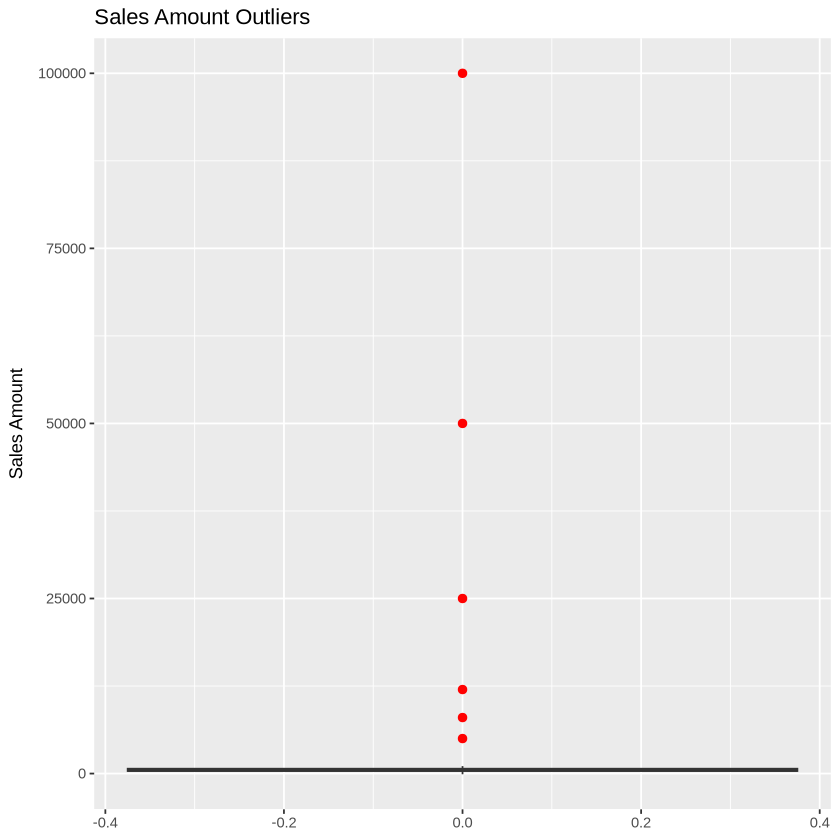

In [27]:
### TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(messy_sales, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.size = 2) +
  labs(title = "Sales Amount Outliers",
       y = "Sales Amount")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [26]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


### 3.4 Outlier Treatment - Option B (Capping)

Apply capping/winsorization to handle outliers while preserving data points.

### 3.2 Outlier Visualization

Create a boxplot to visualize the outliers in Sales_Amount.

Warning message:
“Removed 22 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


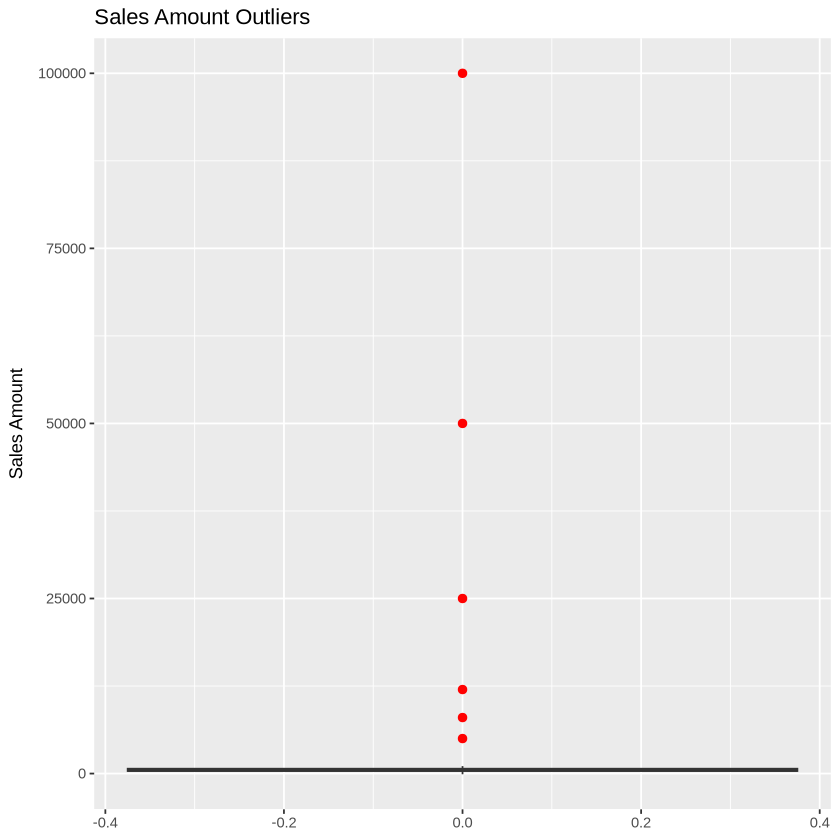

In [28]:
# TODO: Create a boxplot for Sales_Amount
# Use ggplot2 to create a boxplot showing outliers
boxplot_sales <- ggplot(sales_imputed, aes(y = Sales_Amount)) +
  geom_boxplot(outlier.colour = "red", outlier.size = 2) +
  labs(title = "Sales Amount Outliers",
       y = "Sales Amount")
# Hint: ggplot(sales_imputed, aes(y = Sales_Amount)) + geom_boxplot() + ggtitle("Sales Amount Outliers")

# Display the plot
print(boxplot_sales)

### 3.3 Outlier Treatment - Option A (Removal)

Remove rows containing outliers and assess the impact.

In [33]:
### TODO: Remove outliers from the imputed dataset
sales_outliers_removed <- sales_imputed %>%
  filter(Sales_Amount >= lower_threshold & Sales_Amount <= upper_threshold)
# Hint: Use filter() to keep only rows within the threshold bounds

print(paste("Original rows:", nrow(sales_imputed)))
print(paste("After removing outliers:", nrow(sales_outliers_removed)))
print(paste("Rows removed:", nrow(sales_imputed) - nrow(sales_outliers_removed)))

[1] "Original rows: 200"
[1] "After removing outliers: 172"
[1] "Rows removed: 28"


In [34]:
### TODO: Create a capped version of the dataset
sales_outliers_capped <- sales_imputed

In [35]:
### TODO: Apply capping to Sales_Amount
sales_outliers_capped$Sales_Amount <- ifelse(sales_outliers_capped$Sales_Amount > upper_threshold,
                                         upper_threshold,
                                         ifelse(sales_outliers_capped$Sales_Amount < lower_threshold,
                                                lower_threshold,
                                                sales_outliers_capped$Sales_Amount))
### Hint: Use ifelse() to replace values above/below thresholds

In [36]:
### Verify capping worked
print("Sales_Amount range after capping:")
print(range(sales_outliers_capped$Sales_Amount, na.rm = TRUE))

[1] "Sales_Amount range after capping:"
[1] -100.000 1192.331


In [37]:
### Check for remaining outliers
remaining_outliers <- sales_outliers_capped %>%
  filter(Sales_Amount < lower_threshold | Sales_Amount > upper_threshold)
print(paste("Remaining outliers after capping:", nrow(remaining_outliers)))

[1] "Remaining outliers after capping: 0"


---

## Part 4: Final Data Quality Assessment and Decision Making

Choose your final cleaned dataset and justify your decision based on the analysis you've completed.

In [38]:
# TODO: Choose your final cleaned dataset
final_dataset <- sales_outliers_removed

print("=== FINAL DATASET SUMMARY ===")
print(dim(final_dataset))
summary(final_dataset$Sales_Amount)

[1] "=== FINAL DATASET SUMMARY ==="
[1] 172   6


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -100.0   361.8   517.8   508.4   680.2  1058.3 

**Justification for Your Choice:**

[Explain why you chose this particular cleaned dataset. Consider factors like:
- Sample size preservation
- Data quality improvements
- Business impact
- Analysis requirements]

**YOUR JUSTIFICATION:**
I chose the dataset with outliers removed because it maintains a good balance between data quality and sample size. By removing outliers, I ensure that the analysis is not skewed by extreme values, which can distort results. Additionally, the imputation of missing values helps retain as much data as possible without introducing significant bias. This cleaned dataset is more reliable for subsequent analyses and decision-making processes.

### 4.2 Create Comparison Summary

Create a comprehensive comparison of your original and final datasets.

In [41]:
# Create comparison summary
comparison_summary <- data.frame(
  Metric = c("Number of Rows", "Missing Values", "Mean Sales_Amount", "Median Sales_Amount", "Outliers"),
  Original_Data = c(
    nrow(messy_sales),
    sum(is.na(messy_sales)),
    round(mean(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    round(median(messy_sales$Sales_Amount, na.rm = TRUE), 2),
    nrow(outliers)
  ),
  Final_Data = c(
    nrow(final_dataset),
    sum(is.na(final_dataset)),
    round(mean(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    round(median(final_dataset$Sales_Amount, na.rm = TRUE), 2),
    nrow(remaining_outliers)
  )
)

print("=== DATA CLEANING COMPARISON ===")
print(comparison_summary)

[1] "=== DATA CLEANING COMPARISON ==="
               Metric Original_Data Final_Data
1      Number of Rows        200.00     172.00
2      Missing Values         52.00      12.00
3   Mean Sales_Amount       1614.91     508.45
4 Median Sales_Amount        531.29     517.84
5            Outliers          6.00       0.00


---

## Part 5: Reflection Questions

Answer the following questions to demonstrate your understanding of data cleaning concepts and their business implications.

### Question 1: Missing Value Strategy

In what business scenarios would you prefer removing rows with missing values versus imputing them? Provide specific examples.

**YOUR ANSWER:**
In scenarios where the dataset is large and the missing values are minimal, such as in a customer feedback survey where only a few responses are missing, removing those rows may be acceptable as it won't significantly impact the overall analysis. However, in cases where the dataset is small or the missing values are substantial, such as in clinical trial data where patient information is critical, imputation would be preferred to retain as much information as possible and avoid biasing the results.

### Question 2: Outlier Interpretation  

You identified outliers in the Sales_Amount column. In a real business context, what could these outliers represent? Should they always be removed or treated? Explain your reasoning.

**YOUR ANSWER:**

The outliers in the Sales_Amount column could represent different scenarios such as unusually large transactions from bulk purchase or data entry errors. They should not always be removed or treated without understanding their context. For instance, if the outliers are legitimate high-value sales, removing them could lead to underestimating revenue potential. Conversely, if they are due to errors, they should be addressed to maintain data integrity. The decision to remove or treat outliers should be based on analyzing their origin and impact on business decisions.

### Question 3: Data Quality Impact

How might the presence of missing values and outliers affect common business analytics tasks such as calculating average sales, identifying top-performing products, or forecasting future sales?

**YOUR ANSWER:**

[The presence of missing values can lead to inaccurate calculations of average sales, as the absence of data points may skew the results. For example, if high-value sales are missing, the average will be underestimated. Outliers can also distort averages and other statistical measures, making it difficult to identify trends and make well informed business decisions.

### Question 4: Ethical Considerations

What are the ethical implications of removing or modifying data during the cleaning process? How can analysts ensure transparency and maintain data integrity?

**YOUR ANSWER:**

Removing or modifying data can lead to misrepresentation of business operations, potentially misleading stakeholders and affecting decision-making, and it can add bias to the dataset. Analysts should document all cleaning steps, including the reasons for removing or modifying data, and provide access to both the original and cleaned datasets. Transparency in the cleaning process helps maintain trust and allows others to assess the validity of the analyses performed.

---

## Submission Checklist

Before submitting, make sure you have:

- [ ] **Part 1**: Created and inspected the messy dataset
- [ ] **Part 2**: Completed missing value identification and treatment
- [ ] **Part 3**: Detected and treated outliers using IQR method  
- [ ] **Part 4**: Chosen and justified your final cleaned dataset
- [ ] **Part 4**: Created comparison summary table
- [ ] **Part 5**: Answered all reflection questions thoroughly
- [ ] **Code Quality**: All TODO sections completed with working code
- [ ] **Documentation**: Added your name and date at the top
- [ ] **Testing**: Run all cells to verify output
- [ ] **Submission**: Committed and pushed to GitHub

**Great work mastering data cleaning techniques! 🧹✨**

---

## 🚀 Ready to Submit?

### Easy Submission Steps (No Command Line Required!):

1. **Save this notebook** (Ctrl+S or File → Save)

2. **Use VS Code Source Control**:
   - Click the **Source Control** icon in the left sidebar (tree branch symbol)
   - Click the **"+"** button next to your notebook file
   - Type a message: `Submit homework 2 - Data Cleaning - [Your Name]`
   - Click **"Commit"** 
   - Click **"Sync Changes"** or **"Push"**

3. **Verify on GitHub**: Go to your repository online and confirm your notebook appears with your completed work

**📖 Need help?** See [GITHUB_CLASSROOM_SUBMISSION.md](../../GITHUB_CLASSROOM_SUBMISSION.md) for detailed instructions.

**🎉 Congratulations on completing your data cleaning assignment!**